In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("mbsampler.jl")
include("temp.jl")

plot_acfs_all (generic function with 2 methods)

### Scaling with pX:

In [16]:
mb_size = 1
pX_list = logspace(-2,0,8)
Nobs_list = repeat([5000], length(pX_list))
attempts = repeat([5*10^6], length(pX_list))
cov_dist = "uniform"
n_reps = 1
varying = "pX"
include_CV, include_stratified = true, false
prior_sigma = 1e0;

In [17]:
start = time()
for i in 1:length(pX_list) 
    my_model, root = generate_model(50, Nobs_list[i], pX_list[i], cov_dist, prior_sigma) 
    for rep in 1:n_reps 
        run_mbsamplers(my_model, root, mb_size, attempts[i], pX_list[i], 
                       Nobs_list[i], varying, rep, cov_dist, include_CV, include_stratified)
    end
end
print("\n Total time = ", round((time()-start)/60,2), " mins")

Rep = 1; pX = 0.01; stratified, CV, weighted = false true true; time = 20.2 min 
Rep = 1; pX = 0.01; stratified, CV, weighted = false true false; time = 17.19 min 
Rep = 1; pX = 0.01; stratified, CV, weighted = false false true; time = 34.85 min 
Rep = 1; pX = 0.01; stratified, CV, weighted = false false false; time = 15.6 min 
Rep = 1; pX = 0.019306977288832506; stratified, CV, weighted = false true true; time = 19.15 min 
Rep = 1; pX = 0.019306977288832506; stratified, CV, weighted = false true false; time = 17.98 min 
Rep = 1; pX = 0.019306977288832506; stratified, CV, weighted = false false true; time = 32.75 min 
Rep = 1; pX = 0.019306977288832506; stratified, CV, weighted = false false false; time = 16.25 min 
Rep = 1; pX = 0.0372759372031494; stratified, CV, weighted = false true true; time = 18.98 min 
Rep = 1; pX = 0.0372759372031494; stratified, CV, weighted = false true false; time = 12.71 min 
Rep = 1; pX = 0.0372759372031494; stratified, CV, weighted = false false true; ti

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


Rep = 1; pX = 0.13894954943731377; stratified, CV, weighted = false true true; time = 16.48 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


Rep = 1; pX = 0.13894954943731377; stratified, CV, weighted = false true false; time = 12.09 min 
Rep = 1; pX = 0.13894954943731377; stratified, CV, weighted = false false true; time = 27.72 min 
Rep = 1; pX = 0.13894954943731377; stratified, CV, weighted = false false false; time = 17.31 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Rep = 1; pX = 0.2682695795279726; stratified, CV, weighted = false true true; time = 17.23 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Rep = 1; pX = 0.2682695795279726; stratified, CV, weighted = false true false; time = 12.29 min 
Rep = 1; pX = 0.2682695795279726; stratified, CV, weighted = false false true; time = 26.92 min 
Rep = 1; pX = 0.2682695795279726; stratified, CV, weighted = false false false; time = 14.74 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Rep = 1; pX = 0.5179474679231212; stratified, CV, weighted = false true true; time = 14.47 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Rep = 1; pX = 0.5179474679231212; stratified, CV, weighted = false true false; time = 15.7 min 
Rep = 1; pX = 0.5179474679231212; stratified, CV, weighted = false false true; time = 18.26 min 
Rep = 1; pX = 0.5179474679231212; stratified, CV, weighted = false false false; time = 9.71 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Rep = 1; pX = 1.0; stratified, CV, weighted = false true true; time = 9.37 min 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


Rep = 1; pX = 1.0; stratified, CV, weighted = false true false; time = 8.79 min 
Rep = 1; pX = 1.0; stratified, CV, weighted = false false true; time = 13.71 min 
Rep = 1; pX = 1.0; stratified, CV, weighted = false false false; time = 10.05 min 

 Total time = 582.33 mins

#### Read data from file and plot:

In [18]:
stratified = false
cov_dists = ["Laplace", "Gaussian", "uniform"]
subfolder = "scaling_pX"

pX_list = logspace(-2,0,8)
bts_pX = zeros(length(pX_list), n_reps, 4, length(cov_dists),2)
@showprogress for rep in 1:n_reps
    for (i,pX) in enumerate(pX_list) 
        for CV in [true,false] 
            for weighted in [true,false] 
                for (j,cov_dist) in enumerate(cov_dists)
                    for (k,d) in enumerate([50]) 
                        filename  = "/xtmp/PDMP_data_revision/"*subfolder*"/cov_dist:"*cov_dist*"-pX:"*
                        string(pX)*"-rep:"*string(rep)*"-stratified:"*string(stratified)*
                        "-CV:"*string(CV)*"-weighted:"*string(weighted)*"-d:"*string(d)*".jld"
                        skel, bt = load(filename, "xt_skeleton", "bt_skeleton")
                        bts_pX[i,rep,1+CV+2*weighted,j,k] = bt[end]
                        skel, bt = nothing, nothing
                        gc()
                    end
                end
            end
        end
    end
end

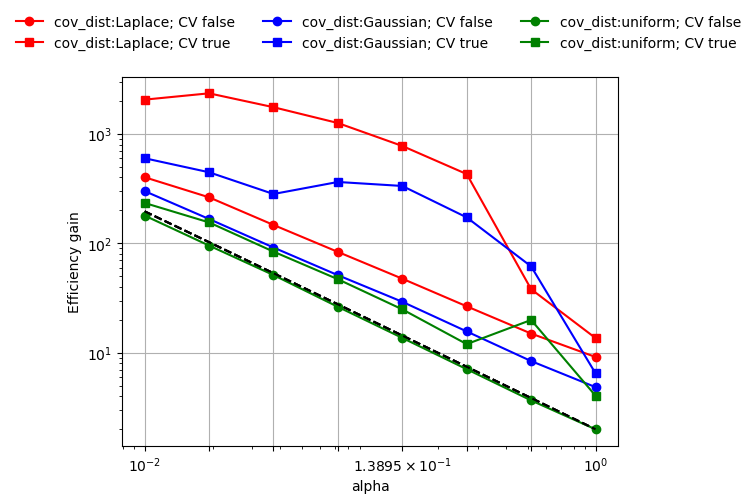

In [19]:
k = 1
colours = ["red", "blue", "green"]
for (j,cov_dist) in enumerate(cov_dists)
    plot(pX_list, mean(bts_pX[:,:,3,j,k]./bts_pX[:,:,1,j,k],2), "o-", color=colours[j], 
        label="cov_dist:"cov_dist*"; CV false")
    plot(pX_list, 2*pX_list.*Nobs_list./(1+pX_list.*Nobs_list)./pX_list, "--", color="black")
    plot(pX_list, mean(bts_pX[:,:,4,j]./bts_pX[:,:,2,j],2), "s-", color=colours[j], 
        label="cov_dist:"cov_dist*"; CV true")
    xlabel("alpha", fontsize=10)
    ylabel("Efficiency gain", fontsize=10)
    grid(true)
    xscale("log")
    xticks(pX_list)
    yscale("log")
end
legend(frameon=false, ncol=3,bbox_to_anchor=(-0.24, 1.2), loc=2);

### Previous stuff:

In [13]:
maxlag = 1000
acfs_all = []
for i in 1:length(xi_samples)
    acf_xi = []
    for j in 1:length(xi_samples[i])
        a = zeros(size(xi_samples[i][j],1), maxlag)
        for dim in 1:size(xi_samples[i][j],1)
            a[dim,:] = acf(xi_samples[i][j][dim,1:end-1], maxlag)
        end
        push!(acf_xi, a)
    end
    push!(acfs_all, acf_xi)
end

In [14]:
for j in 1:8 
    print(Int(round(maximum(abs.(sum(acfs_all[1][j],2))))), " || ", 
          Int(round(maximum(abs.(sum(acfs_all[2][j],2))))), " || ", 
          Int(round(maximum(abs.(sum(acfs_all[3][j],2))))), " || ",
          Int(round(maximum(abs.(sum(acfs_all[4][j],2))))), " || ",
          Int(round(maximum(abs.(sum(acfs_all[5][j],2))))), " \n ")
end

LoadError: [91mBoundsError: attempt to access 0-element Array{Any,1} at index [1][39m

In [2]:
a = zeros(6,5)
a[1,:] = [511, 899, 971, 974, 971]
a[2,:] = [968, 974, 965, 966, 981] 
a[3,:] = [24, 17, 24, 46, 56]
a[4,:] = [262, 172, 194, 453, 949]
a[5,:] = [326, 913, 958, 974, 979]
a[6,:] = [40, 63, 27, 20, 40];

In [3]:
labels = ["uniform subsampling \n without control variates",
            "uniform subsampling \n with control variates",
            "weighted subsampling \n without control variates",
            "weighted subsampling \n with control variates",
            "sorted sub-sampling", 
            "hybrid sub-sampling"]
figs_to_plot = [8,6,7,5,4,3]
for (i,j) in enumerate(figs_to_plot)
    plot(Nobs_list, [maximum(abs.(sum(acfs_all[i][j],2))) for i in 1:5], "o-", label=labels[i]);
end
yscale("log")
xscale("log")
grid(true)
legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.0, ncol=1, fontsize=9)
xlabel("Number of observations", fontsize=10)
ylabel("Integrated auto-correlation time", fontsize=10)
title("Mixing time of slowest component", fontsize=11)
# savefig("plots/IACTs_scaling.pdf", format="pdf", dpi=10000, bbox_inches="tight")

LoadError: [91mUndefVarError: acfs_all not defined[39m

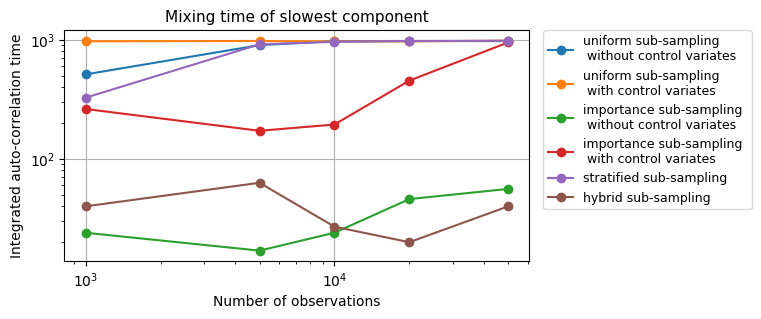

In [11]:
fig = figure("pyplot_subplot_mixed", figsize=(6,3))
Nobs_list = [1000, 5000, 10_000, 20_000, 50_000] 
labels = ["uniform sub-sampling \n without control variates",
            "uniform sub-sampling \n with control variates",
            "importance sub-sampling \n without control variates",
            "importance sub-sampling \n with control variates",
            "stratified sub-sampling", 
            "hybrid sub-sampling"]

for i in 1:6
    plot(Nobs_list, a[i,:], "o-", label=labels[i]);
end
yscale("log")
xscale("log")
grid(true)
legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.0, ncol=1, fontsize=9)
xlabel("Number of observations", fontsize=10)
ylabel("Integrated auto-correlation time", fontsize=10)
title("Mixing time of slowest component", fontsize=11);
savefig("plots/IACTs_scaling.pdf", format="pdf", dpi=10000, bbox_inches="tight")